In [ ]:
# Importing Necessary Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

In [17]:
df = pd.read_csv('UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [18]:
# Checking for null values
df.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [19]:
x = df.drop('CreditCard', axis=1)
y = df['CreditCard']

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

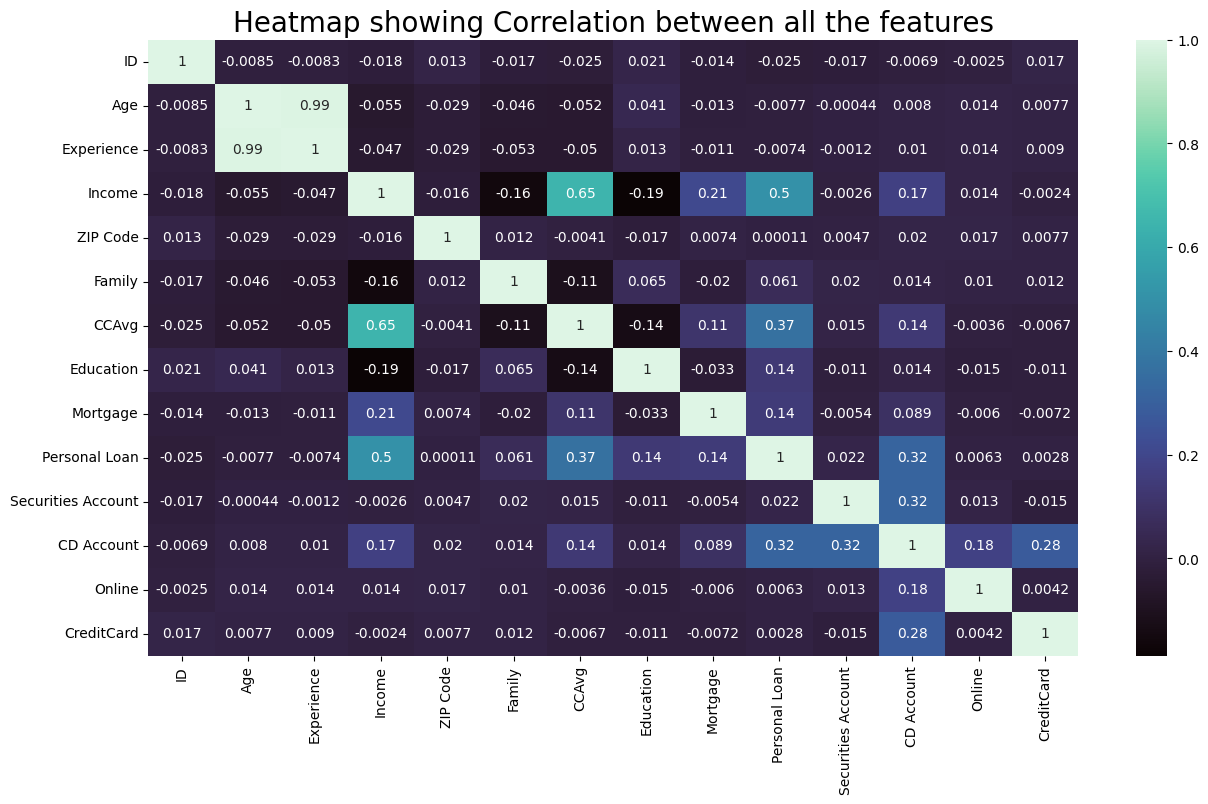

In [28]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df.corr(),annot = True, cmap='mako')

In [31]:
zero_class = df[df.CreditCard==0]
zero_class.shape

(3530, 14)

In [32]:
one_class = df[df.CreditCard==1]
one_class.shape

(1470, 14)

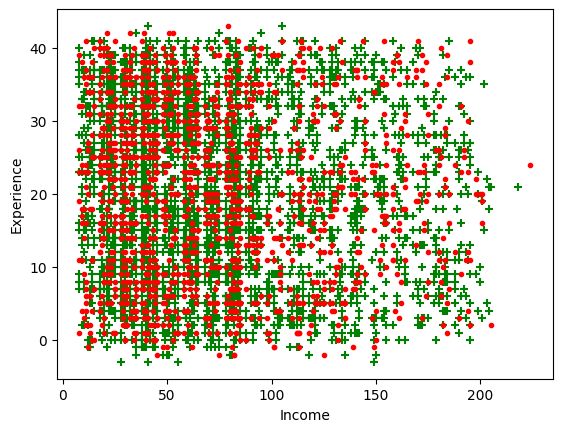

In [33]:
# Income vs Experience scatter plot
plt.xlabel('Income')
plt.ylabel('Experience')
plt.scatter(zero_class['Income'],zero_class['Experience'], color = 'green', marker='+')
plt.scatter(one_class['Income'], one_class['Experience'], color = 'red', marker='.')

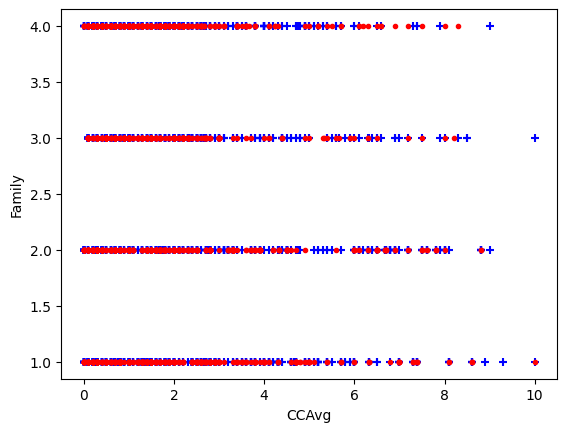

In [34]:
# CCAvg vs Family scatter plot
plt.xlabel('CCAvg')
plt.ylabel('Family')
plt.scatter(zero_class['CCAvg'],zero_class['Family'], color = 'blue', marker='+')
plt.scatter(one_class['CCAvg'], one_class['Family'], color = 'red', marker='.')

In [36]:
# Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df.drop('CreditCard',axis=1)).transform(df.drop('CreditCard',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df.columns[:-1])
df_scaled.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.731704,-1.774417,-1.666078,-0.538229,-0.964114,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-1.731012,-0.029524,-0.096330,-0.864109,-1.443932,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-1.730319,-0.552992,-0.445163,-1.363793,0.738814,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-1.729626,-0.901970,-0.968413,0.569765,0.452243,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-1.728933,-0.901970,-1.055621,-0.625130,-0.859007,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


In [37]:
# Splitting the columns in to dependent variable (x) and independent variable (y).
x = df_scaled
y = df['CreditCard']

# Implementation of SVM

In [38]:
# Split data in to train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [39]:
# Apply SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.749


<Axes: >

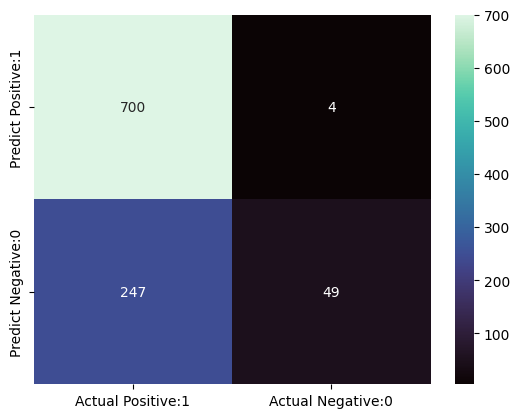

In [40]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [42]:
# Original SVM Model Classification Report
print('Original SVM Model Classification Report:\n', classification_report(y_test, y_pred))

Original SVM Model Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



In [51]:
# Hyperparameter tuning using GridSearchCV
param_dist = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf', 'poly']}
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=10, refit=True, verbose=3, cv=5, n_jobs=-1)
random_search.fit(x_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters: ", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:  {'kernel': 'linear', 'gamma': 0.01, 'C': 10}


In [53]:
best_params = random_search.best_params_

# Apply SVM Model with the best parameters
best_svc = SVC(**best_params)
best_svc.fit(x_train, y_train)

# Predictions and Evaluation with Best Parameters
y_pred_best = best_svc.predict(x_test)
print('\nSVM Model with Best Parameters accuracy: {0:0.3f}'.format(accuracy_score(y_test, y_pred_best)))


SVM Model with Best Parameters accuracy: 0.747


Best Parameters Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.86      0.17      0.29       296

    accuracy                           0.75      1000
   macro avg       0.80      0.58      0.57      1000
weighted avg       0.78      0.75      0.68      1000



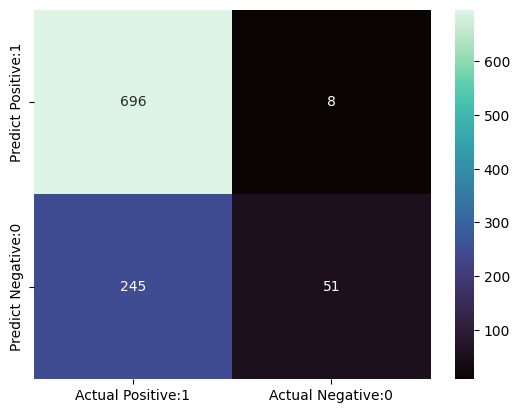

In [55]:
# Best Parameters Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)
cm_matrix_best = pd.DataFrame(data=cm_best, columns=['Actual Positive:1', 'Actual Negative:0'], 
                               index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_best, annot=True, fmt='d', cmap='mako')

# Best Parameters Classification Report
print('Best Parameters Classification Report:\n', classification_report(y_test, y_pred_best))

In [26]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.86      0.17      0.29       296

    accuracy                           0.75      1000
   macro avg       0.80      0.58      0.57      1000
weighted avg       0.78      0.75      0.68      1000



**Gaussian RBF Kernel**

Gaussian Radial Basis Formula
F(x, xj) = exp(-gamma * ||x - xj||^2)

The value of gamma varies from 0 to 1. The most preferred value for gamma is 0.1

In [28]:
# Apply SVM model using Gaussian RBF kernel function 
rbf_svc=SVC(kernel='rbf').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.749


<Axes: >

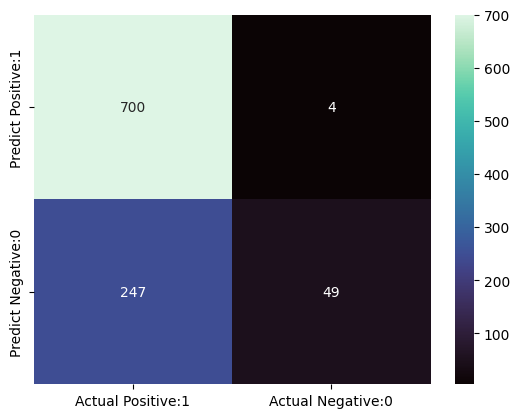

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [30]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



# Python Application of Regression Trees



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = {
    'Position': [
        'Business Analyst',
        'Junior Consultant',
        'Senior Consultant',
        'Manager',
        'Country Manager',
        'Region Manager',
        'Partner',
        'Senior Partner',
        'C-level',
        'CEO'
    ],
    'Level': [
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10
    ],
    'Salary': [
        45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000
    ]
}

df = pd.DataFrame(data)
X = df.iloc[:, 1:2].values
y = df.iloc[:, -1].values

In [10]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [11]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

## Training the Decision Tree model

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X, y)

DecisionTreeRegressor()

## Predicting a value

In [13]:
regressor.predict([[6.5]])

array([150000.])

## Visualising the model

Text(0.5, 0, 'Level')

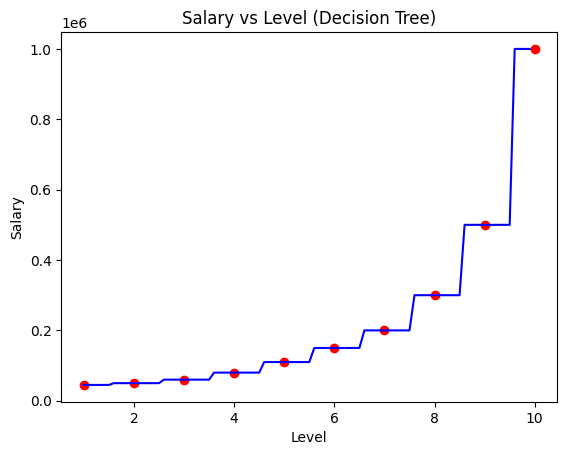

In [14]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Salary vs Level (Decision Tree)')
plt.ylabel('Salary')
plt.xlabel('Level')

In [31]:
# Fork this repository: https://github.com/marcvaleros/SVM-Regression-Trees
# Experiment on various kernel functions and hyperparameters of the SVM classifier. (https://scikit-learn.org/stable/modules/svm.html#kernel-functions)  
# Identify which SVM classifier performs better (Linear or Non-linear) with the given dataset.
# Check the accuracy of your model.
                                                                                     